# 02 Introduction to ML with Python

## Matplotlib

A workhorse of scientific visualization in Python.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

[deprecated] Set figure appearance in notebook (no pop up).

```ipython
%matplotlib inline
```

### Line Plot

Draw a line plot of a function 

$$
    y = x ^2
$$

for $x$ from -1 to 1.

In [2]:
xs = np.linspace(-1, 1, 101)
ys = xs ** 2

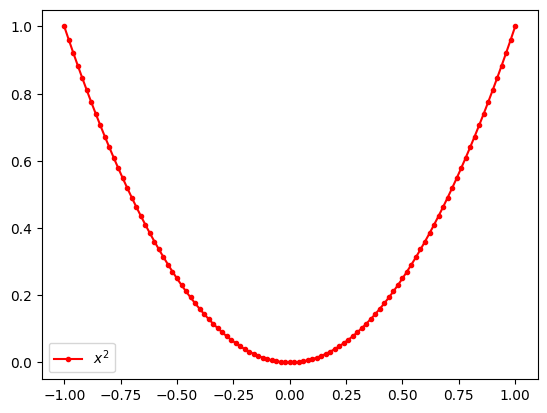

In [7]:
plt.plot(xs, ys, marker='.', color='r', label='$x^2$')
plt.legend()

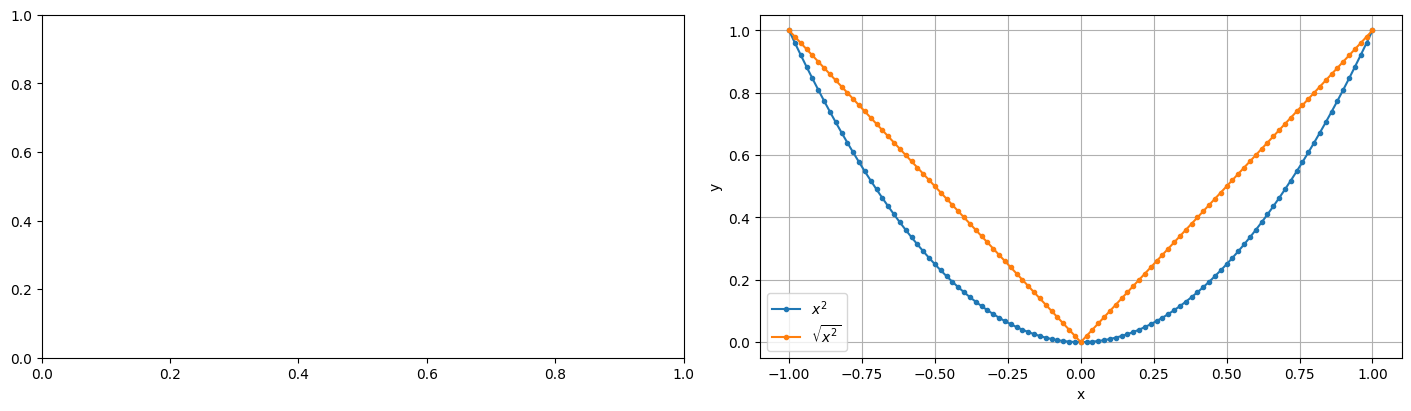

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 4), layout='constrained')

ax = axs[1]
ax.plot(xs, ys, marker='.', label=r'$x^2$')
ax.plot(xs, np.sqrt(ys), marker='.', label=r'$\sqrt{x^2}$')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)

plt.show()

### Histogram

In [13]:
cats = np.random.randint(low=0, high=10, size=1000)

Text(0, 0.5, 'Count')

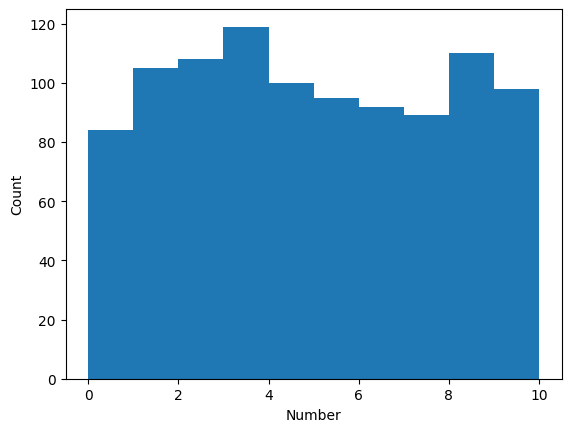

In [17]:
plt.hist(cats, bins=10, range=(0, 10), width=1.0)
plt.xlabel('Number')
plt.ylabel('Count')

### Bar Plot

In [19]:
cats

array([7, 8, 4, 2, 1, 5, 6, 7, 4, 2, 9, 3, 7, 4, 2, 3, 1, 8, 1, 1, 9, 4,
       2, 1, 5, 9, 4, 2, 6, 8, 3, 5, 1, 9, 7, 4, 0, 4, 0, 2, 8, 7, 0, 7,
       9, 2, 1, 6, 2, 1, 8, 9, 4, 7, 3, 8, 7, 3, 3, 7, 2, 3, 8, 2, 8, 8,
       9, 9, 3, 4, 2, 2, 8, 5, 5, 8, 9, 3, 8, 1, 6, 4, 3, 9, 1, 1, 3, 7,
       0, 7, 3, 1, 0, 3, 7, 4, 3, 0, 9, 8, 4, 8, 1, 7, 5, 0, 3, 4, 9, 1,
       5, 9, 1, 1, 0, 3, 2, 0, 1, 2, 8, 6, 4, 2, 2, 1, 3, 2, 8, 1, 8, 1,
       6, 9, 8, 7, 6, 9, 7, 7, 2, 8, 0, 0, 1, 5, 7, 7, 5, 2, 7, 2, 4, 9,
       0, 1, 7, 5, 3, 6, 8, 4, 4, 6, 4, 9, 6, 0, 6, 4, 3, 0, 9, 2, 5, 9,
       6, 1, 1, 2, 8, 2, 1, 9, 4, 6, 3, 1, 4, 9, 5, 6, 6, 2, 1, 2, 1, 1,
       2, 2, 1, 8, 9, 0, 8, 0, 7, 3, 2, 7, 8, 3, 3, 8, 8, 9, 5, 8, 9, 3,
       3, 9, 7, 9, 0, 9, 4, 6, 1, 0, 4, 4, 3, 5, 8, 1, 0, 7, 8, 9, 6, 3,
       6, 7, 0, 6, 2, 6, 0, 8, 1, 4, 7, 2, 7, 9, 6, 1, 9, 8, 8, 1, 8, 6,
       0, 0, 5, 4, 1, 2, 3, 9, 0, 9, 4, 0, 6, 4, 8, 4, 7, 4, 5, 8, 6, 7,
       4, 3, 6, 8, 5, 2, 9, 2, 5, 4, 1, 5, 1, 4, 2,

In [22]:
counts = np.bincount(cats)
counts

array([ 84, 105, 108, 119, 100,  95,  92,  89, 110,  98])

In [24]:
numbers = np.arange(10)

<BarContainer object of 10 artists>

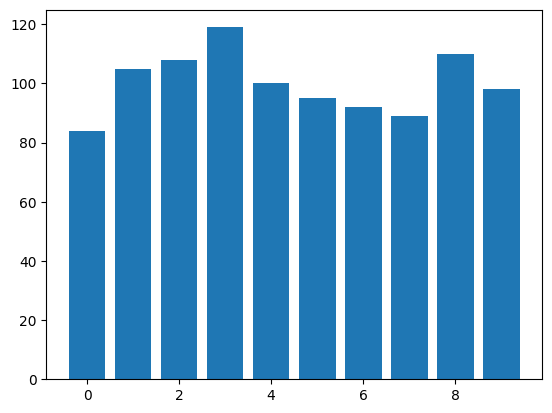

In [27]:
plt.bar(numbers, counts)

### Scatter Plot

Let's generate random points on a 2D plane and plot them.

In [28]:
n_points = 100
n_dims = 2

In [29]:
xs = np.random.normal(loc=0.0, scale=1.0, size=(n_points, n_dims))
xs.shape

(100, 2)

In [36]:
xs[:5]

array([[ 0.48670473, -0.22935736],
       [-1.54387923, -1.16934784],
       [-0.47978104,  0.31138709],
       [ 0.81350206, -1.09688394],
       [-0.54324732, -0.44013888]])

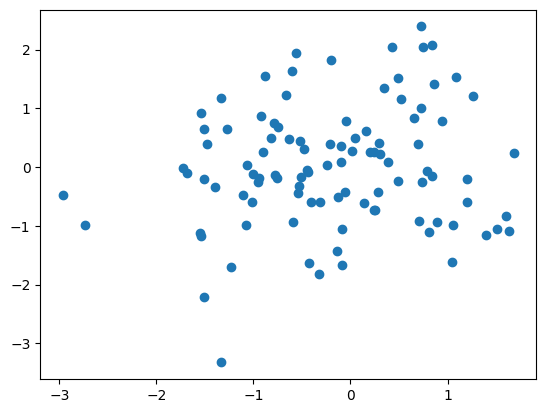

In [35]:
plt.scatter(xs[:, 0], xs[:, 1])

## Sklearn

### Toy Problem

Let's solve a toy problem on a synthetic dataset.

1. Generate synthetic dataset.
2. Build a model.
3. Train a model.
4. Evaluate a model.
5. Select best model.

#### Synthetic data

In [37]:
from sklearn.datasets import make_moons

In [40]:
xs, ys = make_moons(n_samples=200, noise=0.1)

In [41]:
xs[:5]

array([[ 0.67125569, -0.29645975],
       [ 1.67693364, -0.31925951],
       [ 2.05224091,  0.04264705],
       [ 1.77618258,  0.12673704],
       [ 1.99973111,  0.3002457 ]])

In [43]:
ys[:10]

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0])

In [44]:
xs1 = xs[ys == 0]
xs1.shape

(100, 2)

In [46]:
xs2 = xs[ys == 1]
xs2.shape

(100, 2)

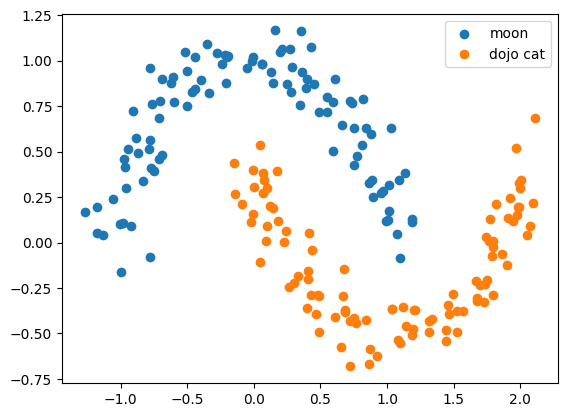

In [49]:
plt.scatter(xs1[:, 0], xs1[:, 1], label='moon')
plt.scatter(xs2[:, 0], xs2[:, 1], label='dojo cat')
plt.legend()

#### Toy classifier

Train and evaluate a classifier.

In [51]:
from sklearn.linear_model import LogisticRegression

Every algorithm from `sklearn` has a set of parameters which could be specified on an instantiation of an estimator.

In [53]:
clf = LogisticRegression(C=10.0)

Every algorithm has a method `fit`.

```
Signature: estimator.fit(X, y)

Parameters
----------
X : {array-like} of shape (n_samples, n_features)
    Training vectors, where `n_samples` is the number of samples
    and `n_features` is the number of features..

y : array-like of shape (n_samples,)
    Target values or classes.
```

In [54]:
xs.shape

(200, 2)

In [55]:
features = xs
labels = ys
clf.fit(features, labels);

A classifier/regressor in `sklearn` usually has a method `.predict()` which calculates predictions.

In [56]:
preds = clf.predict(features)

In [58]:
preds

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1])

In [59]:
labels

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1])

In [61]:
def vis(ax: plt.Axes, xs, ys):
    xs1 = xs[ys == 0]
    xs2 = xs[ys == 1]
    ax.scatter(xs1[:, 0], xs1[:, 1], label='moon')
    ax.scatter(xs2[:, 0], xs2[:, 1], label='dojo cat')
    ax.legend()

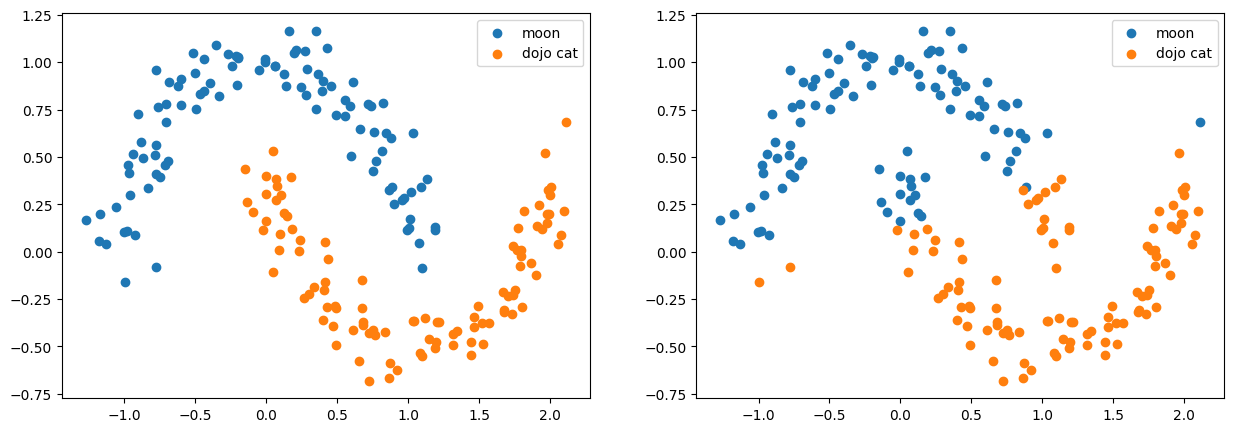

In [62]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
vis(axs[0], features, labels)
vis(axs[1], features, preds)
plt.show()

### Accuracy

Let's estimate how accurate our model are. The simplest meature is _accuracy_ metric which is defined as follows.

$$
    accuracy = \frac{1}{N} \sum_k^N [y^{(k)}_{true} == y^{(k)}_{pred}]
$$

It basically says what percent of target labels we predicted correctly.

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(labels, preds)

0.845

In [66]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(labels, preds))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       100
           1       0.84      0.85      0.85       100

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
confusion_matrix(labels, preds)

array([[84, 16],
       [15, 85]])

### Model Selection

We onl

![Train, test, and validation data split][1]

[1]: train-test-val.png

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [73]:
X_train.shape

(160, 2)

In [75]:
X_test.shape

(40, 2)

In [79]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)

In [81]:
y_preds.shape == y_test.shape

True

In [82]:
accuracy_score(y_test, y_preds)

0.875

In [84]:
from sklearn.model_selection import cross_validate

In [86]:
cv = cross_validate(clf, features, labels, cv=3, scoring=['accuracy', 'precision', 'recall'])
cv

{'fit_time': array([0.00665188, 0.00604677, 0.00470114]),
 'score_time': array([0.01224828, 0.01190948, 0.00847197]),
 'test_accuracy': array([0.88059701, 0.82089552, 0.84848485]),
 'test_precision': array([0.93333333, 0.8       , 0.82857143]),
 'test_recall': array([0.82352941, 0.84848485, 0.87878788])}

In [87]:
cv['test_accuracy'].mean()

0.8499924619327605

##### Bridging to `pandas`

Dictionary is not very convinient for post processing of data. Let's convert it to `pandas.DataFraem` and make couple of tricks.

In [89]:
import pandas as pd

In [90]:
df = pd.DataFrame(cv)
df

,fit_time,score_time,test_accuracy,test_precision,test_recall
0,0.006652,0.012248,0.880597,0.933333,0.823529
1,0.006047,0.011909,0.820896,0.800000,0.848485
2,0.004701,0.008472,0.848485,0.828571,0.878788


In [91]:
df = df[df.columns[2:]]
df

,test_accuracy,test_precision,test_recall
0,0.880597,0.933333,0.823529
1,0.820896,0.800000,0.848485
2,0.848485,0.828571,0.878788


In [92]:
df.mean()

test_accuracy     0.849992
test_precision    0.853968
test_recall       0.850267
dtype: float64

## Pandas

The most usefull and commonly used library for tabular data.

In [94]:
import numpy as np
import pandas as pd

In [99]:
url = 'https://raw.github.com/mattdelhey/kaggle-titanic/master/Data/train.csv'

In [100]:
titanic = pd.read_csv(url)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [101]:
titanic

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [102]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [103]:
titanic.sort_values(by='age', ascending=False).head(5)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


Indexing can be tricky.

In [104]:
titanic[['age', 'name']].head(5)

,age,name
0,22.0,"Braund, Mr. Owen Harris"
1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,26.0,"Heikkinen, Miss. Laina"
3,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,35.0,"Allen, Mr. William Henry"


In [106]:
titanic.iloc[:5]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
titanic.iloc[[2, 5, 6], 2:5]

,name,sex,age
2,"Heikkinen, Miss. Laina",female,26.0
5,"Moran, Mr. James",male,NaN
6,"McCarthy, Mr. Timothy J",male,54.0


In [108]:
df = titanic.set_index('ticket')

In [110]:
df = df.sort_index()

In [112]:
df.loc['W./C. 6609']

survived                               0
pclass                                 3
name        Harknett, Miss. Alice Phoebe
sex                               female
age                                  NaN
sibsp                                  0
parch                                  0
fare                                7.55
cabin                                NaN
embarked                               S
Name: W./C. 6609, dtype: object

In [111]:
df

,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked
ticket,,,,,,,,,,
110152,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,86.500,B79,S
110152,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,86.500,B77,S
110152,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,86.500,B77,S
110413,0,1,"Taussig, Mr. Emil",male,52.0,1,1,79.650,E67,S
110413,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,79.650,E67,S
...,...,...,...,...,...,...,...,...,...,...
W./C. 6609,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,7.550,NaN,S
W.E.P. 5734,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,61.175,E31,S
W/C 14208,0,2,"Harris, Mr. Walter",male,30.0,0,0,10.500,NaN,S


In [113]:
type(titanic)

pandas.core.frame.DataFrame

In [115]:
type(titanic.age)

pandas.core.series.Series

In [116]:
titanic['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

You can extract a numpy array

In [ ]:
type(titanic.values)  # depracted
type(titanic.to_numpy())

In [ ]:
titanic.age.to_numpy()[:10]

In [ ]:
titanic.age.to_numpy()

See more details here: 10 Minutes to pandas (actually it requires much more)

http://pandas.pydata.org/pandas-docs/stable/10min.html

## Seaborn

A high-level library for visualization and exploratory data analysis.

In [122]:
!pip install seaborn

In [123]:
import seaborn as sns

In [ ]:
# sns.set() allows to use a more attractive color scheme for plots
sns.set()

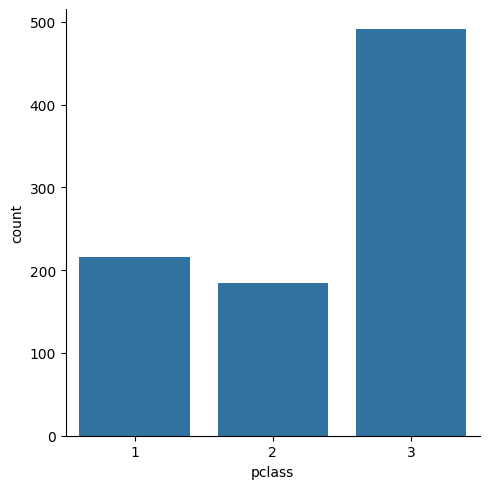

In [124]:
sns.catplot(x="pclass", kind="count", data=titanic)

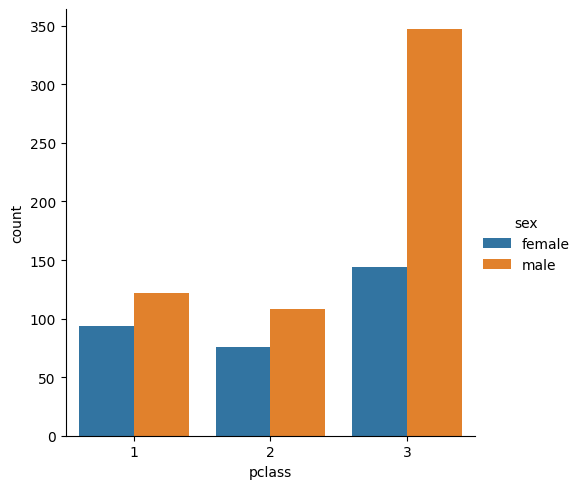

In [125]:
sns.catplot(titanic, x="pclass", hue="sex", kind="count")

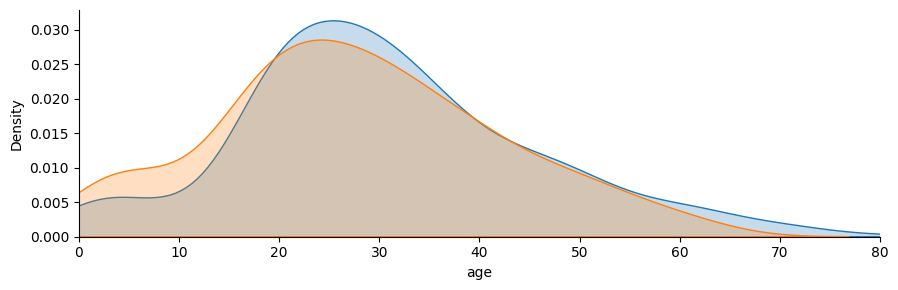

In [127]:
fg = sns.FacetGrid(titanic, hue="sex", aspect=3)
fg.map(sns.kdeplot, "age", fill=True)
fg.set(xlim=(0, 80));

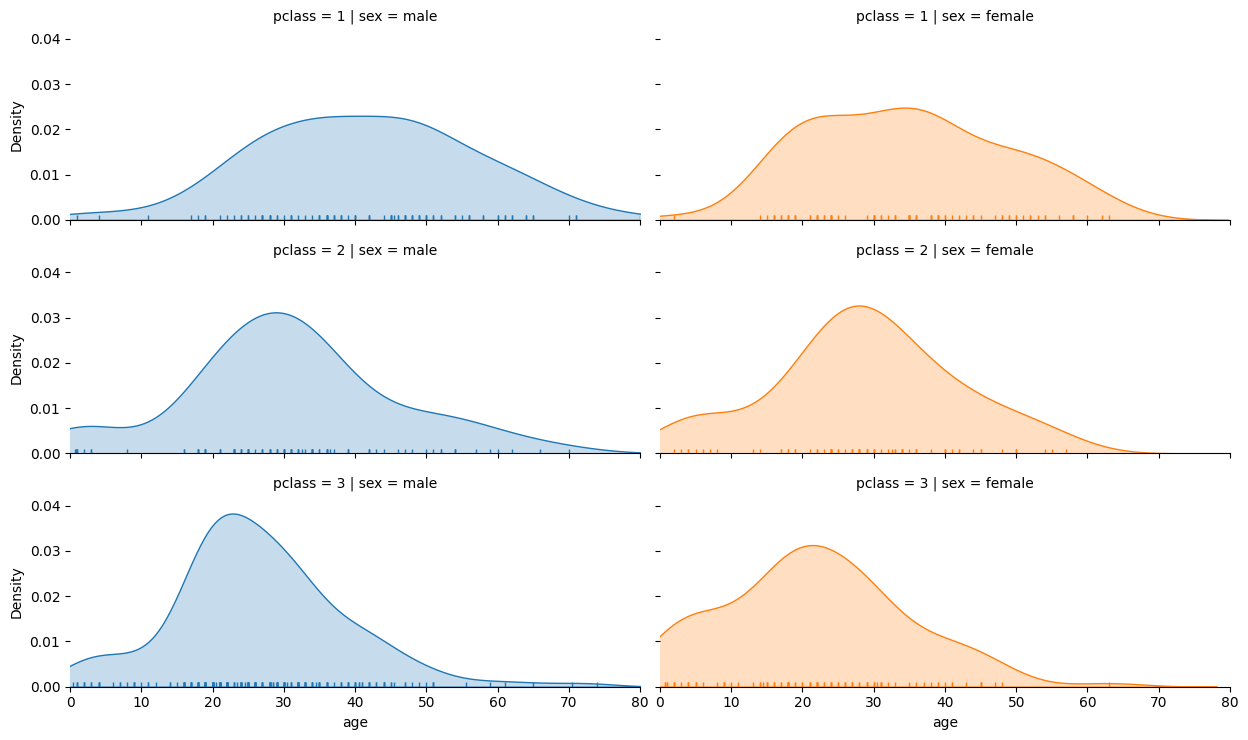

In [129]:
fg = sns.FacetGrid(titanic, col="sex", row="pclass", hue="sex", height=2.5, aspect=2.5)
fg.map(sns.kdeplot, "age", fill=True)
fg.map(sns.rugplot, "age")
sns.despine(left=True)
fg.set(xlim=(0, 80));

Visualising the survival of passengers based on classes.

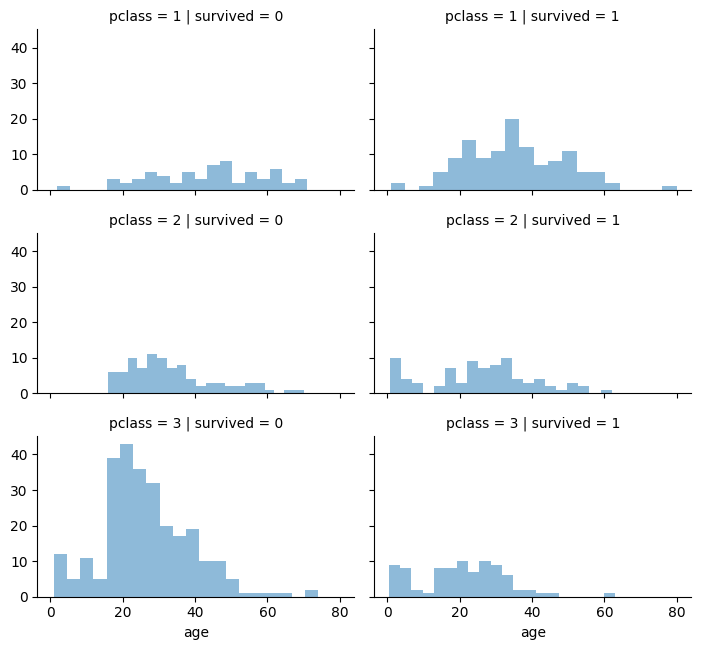

In [130]:
grid = sns.FacetGrid(titanic, col='survived', row='pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

Visualising Class and Embarkment with Survivability.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


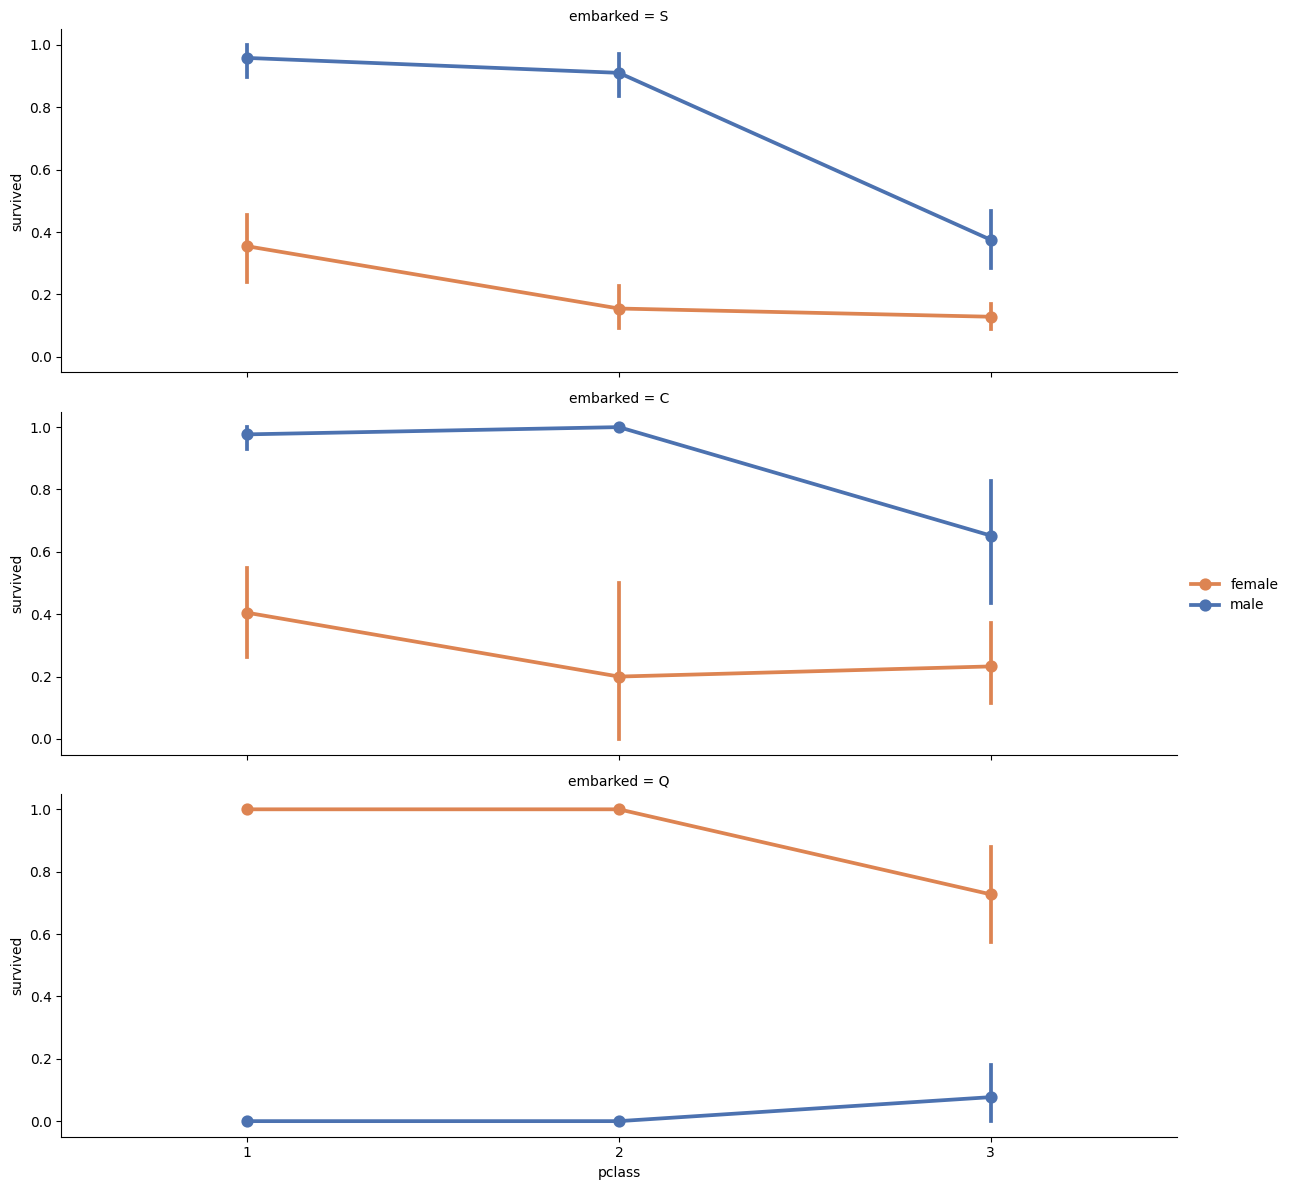

In [131]:
grid = sns.FacetGrid(titanic, row ='embarked', height=4, aspect=3)
grid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette='deep')
grid.add_legend()

See more example of Seaborn visualizations for the Titanic dataset here

https://gist.github.com/mwaskom/8224591

## Model Problem

1. Load data from the csv file.
2. Check column names.
3. Look for dependencies between features and the target vector.

Public Kaggle competition is [here][1] (for those who want compete for fun).

[1]: https://www.kaggle.com/competitions/titanic

### Data Preprocessing

In [132]:
from sklearn.neighbors import KNeighborsClassifier

Let's do  little bit of processing to make some different variables that might be more interesting to plot. Since this notebook is focused on visualization, we're going to do this without much comment.

In [133]:
titanic = titanic.drop(['name', 'ticket', 'cabin'], axis=1)
titanic['sex'] = titanic.sex.map({'male': 0, 'female': 1})
titanic = pd.get_dummies(titanic, dummy_na=True, columns=['embarked'])
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,embarked_nan
0,0,3,0,22.0,1,0,7.2500,False,False,True,False
1,1,1,1,38.0,1,0,71.2833,True,False,False,False
2,1,3,1,26.0,0,0,7.9250,False,False,True,False
3,1,1,1,35.0,1,0,53.1000,False,False,True,False
4,0,3,0,35.0,0,0,8.0500,False,False,True,False


In [147]:
titanic[titanic.columns[:7]]

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
889,1,1,0,26.0,0,0,30.0000


In [134]:
titanic.count()

survived        891
pclass          891
sex             891
age             714
sibsp           891
parch           891
fare            891
embarked_C      891
embarked_Q      891
embarked_S      891
embarked_nan    891
dtype: int64

In [135]:
# titanic.dropna(inplace=True)
titanic = titanic.dropna()
titanic.head(6)

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,embarked_nan
0,0,3,0,22.0,1,0,7.2500,False,False,True,False
1,1,1,1,38.0,1,0,71.2833,True,False,False,False
2,1,3,1,26.0,0,0,7.9250,False,False,True,False
3,1,1,1,35.0,1,0,53.1000,False,False,True,False
4,0,3,0,35.0,0,0,8.0500,False,False,True,False
6,0,1,0,54.0,0,0,51.8625,False,False,True,False


In [136]:
titanic.count()

survived        714
pclass          714
sex             714
age             714
sibsp           714
parch           714
fare            714
embarked_C      714
embarked_Q      714
embarked_S      714
embarked_nan    714
dtype: int64

Our target value is wheter passnager survice or not (`survived`). The rest of columns are features.

In [149]:
titanic = titanic[titanic.columns[:7]]
titanic

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
889,1,1,0,26.0,0,0,30.0000


In [151]:
# extract X - features & y - targets
X = titanic.drop('survived', axis=1)
y = titanic.survived

#### Now it's time to build a model

In [138]:
# initialize a classifier
clf = KNeighborsClassifier()

# train the classifier
clf.fit(X, y)

# calculate predictions
y_predicted = clf.predict(X)

# estimate accuracy
print('Accuracy of prediction is {}'.format(np.mean(y == y_predicted)))

Accuracy of prediction is 0.7927170868347339


In [139]:
#you can also specify some parameters during initialization
clf = KNeighborsClassifier(n_neighbors=10)

clf.fit(X, y)
y_predicted = clf.predict(X)
print('Accuracy of prediction is {}'.format(np.mean(y == y_predicted)))

Accuracy of prediction is 0.742296918767507


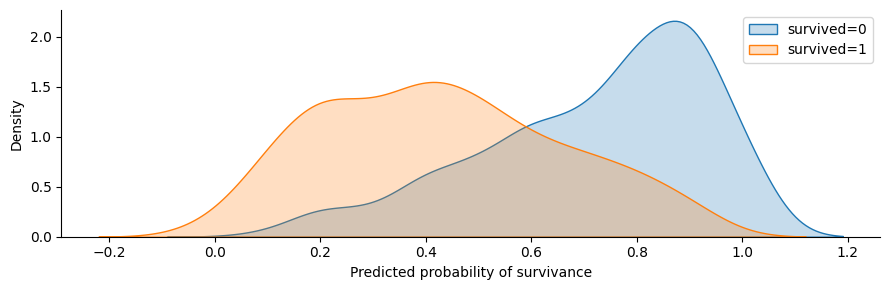

In [141]:
# you can also predict probabilities of belonging to a particular class
proba = clf.predict_proba(X)
proba_df = pd.DataFrame(proba, index=y.index, columns=[0, 1])
proba_df['true'] = y

fg = sns.FacetGrid(proba_df, hue="true", aspect=3)
fg.map(sns.kdeplot, 0, fill=True)
plt.xlabel('Predicted probability of survivance')
plt.legend(['survived=0', 'survived=1'])